In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
regr = LinearRegression()

In [2]:
df_train = pd.read_csv('train.csv')
df_train = df_train.dropna(0)
x = df_train[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']]
y = df_train.NU_NOTA_MT
assert(len(x) == len(y))

In [6]:
l_lc = 'Nota da prova de Linguagens e Códigos'
l_cn = 'Nota da prova de Ciências da Natureza'
l_ch = 'Nota da prova de Ciências Humanas'

In [3]:
# todas as notas
regr = LinearRegression()
regr.fit(x, y)
mse  = np.mean((y - regr.predict(x))**2)
print(mse)

4557.107901430968


In [4]:
# Treino com Nota da prova de Linguagens e Códigos
regr_lc = LinearRegression()
regr_lc.fit(x[['NU_NOTA_LC']], y)
np.mean((y - regr_lc.predict(x[['NU_NOTA_LC']]))**2)

4798.617256272561

In [5]:
# Treino com Nota da prova de Ciências da Natureza'
regr_lc = LinearRegression()
regr_lc.fit(x[['NU_NOTA_CN']], y)
np.mean((y - regr_lc.predict(x[['NU_NOTA_CN']]))**2)

4758.517005892204

In [7]:
# Treino com Nota da prova de Ciências Humanas
regr_lc = LinearRegression()
regr_lc.fit(x[['NU_NOTA_CH']], y)
np.mean((y - regr_lc.predict(x[['NU_NOTA_CH']]))**2)

5084.2278794228105

In [9]:
regr_lc = LinearRegression()
regr_lc.fit(x[['NU_NOTA_CN', 'NU_NOTA_LC']], y)
np.mean((y - regr_lc.predict(x[['NU_NOTA_CN', 'NU_NOTA_LC']]))**2)

4557.525718057588

In [10]:
from sklearn.model_selection import train_test_split
# geralmente dividide 30 % para teste e 70 para treino
x_treino, x_teste, y_treino, y_teste = train_test_split(x , y, test_size=0.30,random_state=5)


In [11]:
print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(44, 3) (20, 3) (44,) (20,)


In [12]:
regr = LinearRegression()
regr.fit(x_treino, y_treino)
pre_treino = regr.predict(x_treino)
pre_teste = regr.predict(x_teste)

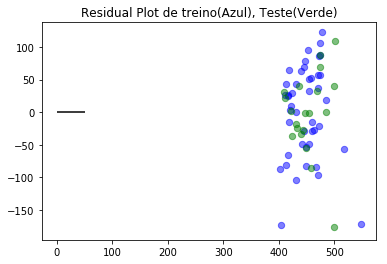

In [13]:
plt.scatter(regr.predict(x_treino), regr.predict(x_treino) - y_treino, c='b', s=40, alpha=0.5)
plt.scatter(regr.predict(x_teste), regr.predict(x_teste) - y_teste, c='g', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title('Residual Plot de treino(Azul), Teste(Verde)')
plt.show()

In [14]:
r_treino = LinearRegression()
r_treino.fit(x_treino, y_treino)
np.mean((y_treino - r_treino.predict(x_treino))**2)


4913.803103992036